In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
import scipy
from scipy.io.wavfile import write
from scipy.fft import fft, fftfreq
import itertools
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import gdown
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq

In [10]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi для преобразования в радианы
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

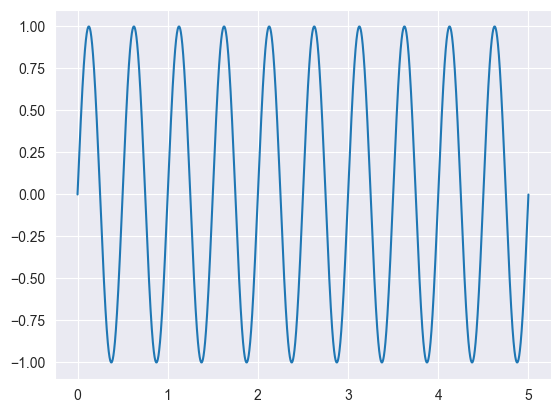

In [11]:
SAMPLE_RATE = 44100  # Гц
DURATION = 5  # Секунды

# Генерируем волну с частотой 2 Гц, которая длится 5 секунд
x, y = generate_sine_wave(freq = 2, sample_rate = 44100, duration = 5)
plt.plot(x, y)
plt.show()

In [17]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)

noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

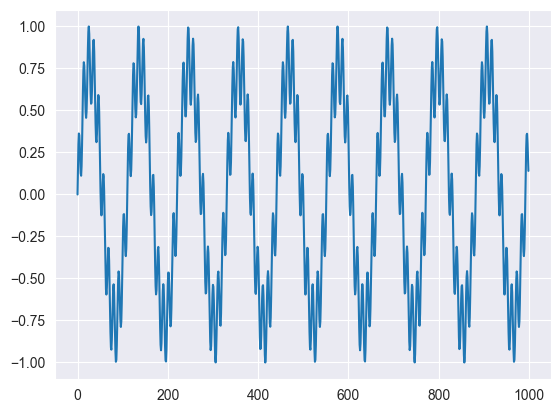

In [18]:
normalized_tone = mixed_tone / mixed_tone.max()

plt.plot(normalized_tone[:1000])
plt.show()

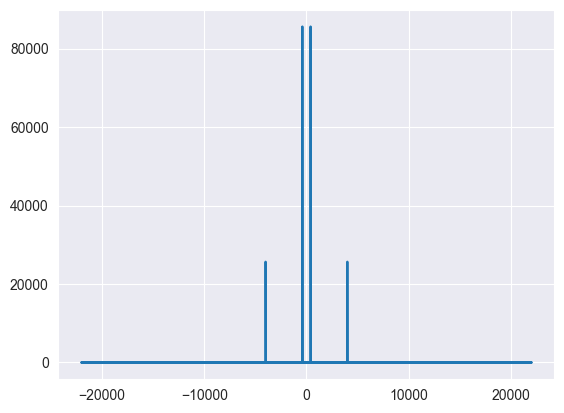

In [20]:


# число точек в normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

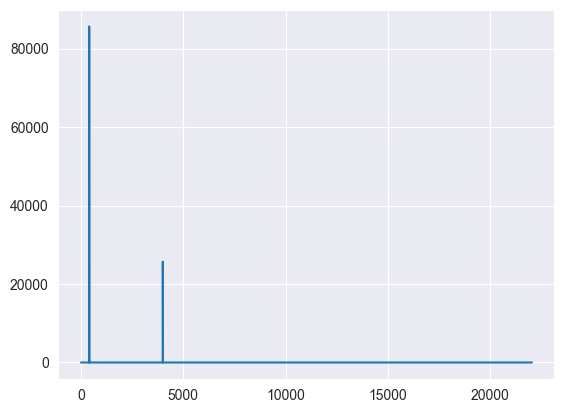

In [24]:


# обратите внимание на r в начале имён функций
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1/SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

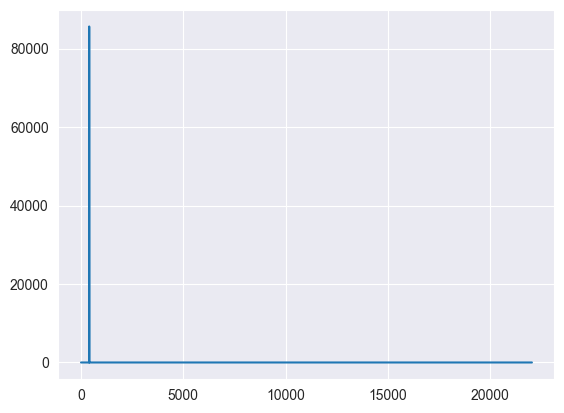

In [22]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Наша целевая частота - 4000 Гц
target_idx = int(points_per_freq * 4000)
yf[target_idx-2:target_idx+2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

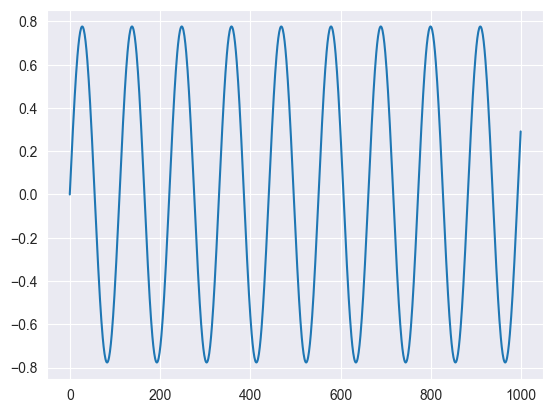

In [23]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()